In [ ]:
!pip install deap
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from pandas import read_csv

# List of all the column names since there was none in the data
columns = ['Age','Workclass','Id','Education','Education Num','Marital Status',
       'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
       'Hours/Week','Country','Salary']

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
data = read_csv(url,header=None,names=columns)

data.drop('Id',axis=1, inplace=True)

print(data.shape)


(32561, 14)


In [ ]:
data.head()

,Age,Workclass,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
print('Dataset columns with null values:\n', data.isnull().sum())

Dataset columns with null values:
 Age               0
Workclass         0
Education         0
Education Num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours/Week        0
Country           0
Salary            0
dtype: int64


In [ ]:
#checking for duplicated rows and missing values
print(data.duplicated().sum())
print(data.isnull().sum().sum())

3465
0


In [ ]:
X = data.iloc[:, 0:13]
y = data.iloc[:, 13:14]

X

,Age,Workclass,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [ ]:
y

,Salary
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
32556,<=50K
32557,>50K
32558,<=50K
32559,<=50K


In [ ]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

encoder = ce.OrdinalEncoder()
X = encoder.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn import model_selection
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
svm_classifier = svm.SVC(probability=True)
cv_results = model_selection.cross_val_score(svm_classifier,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')

print('[SVM] mean: ',cv_results.mean())

In [ ]:
dt_classifier = DecisionTreeClassifier()
cv_results = model_selection.cross_val_score(dt_classifier,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')

print('[DT] mean: ',cv_results.mean())

In [ ]:
knn_classifier = KNeighborsClassifier()
cv_results = model_selection.cross_val_score(knn_classifier,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')

print('[KNN] mean: ',cv_results.mean())

In [ ]:
gb_classifier = GradientBoostingClassifier()
cv_results = model_selection.cross_val_score(gb_classifier,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')

print('[GB] mean: ',cv_results.mean())

[GB] mean:  0.8629452400116756


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

svm_classifier.fit(X_train,y_train)
dt_classifier.fit(X_train,y_train)
knn_classifier.fit(X_train,y_train)
gb_classifier.fit(X_train,y_train)

# Now you have the true labels and predicted probabilities/scores
y_true = y_test  # True labels from the test data


# Make predictions using your trained model
y_pred1 = svm_classifier.predict_proba(X_test)[::,1]
fpr1, tpr1, thresholds1 = roc_curve(y_true, y_pred1)
roc_auc1 = auc(fpr1, tpr1)

# Make predictions using your trained model
y_pred2 = dt_classifier.predict_proba(X_test)[::,1]
fpr2, tpr2, thresholds2 = roc_curve(y_true, y_pred2)
roc_auc2 = auc(fpr2, tpr2)

# Make predictions using your trained model
y_pred3 = knn_classifier.predict_proba(X_test)[::,1] 
fpr3, tpr3, thresholds3 = roc_curve(y_true, y_pred3)
roc_auc3 = auc(fpr3, tpr3)

# Make predictions using your trained model
y_pred4 = gb_classifier.predict_proba(X_test)[::,1] 
fpr4, tpr4, thresholds3 = roc_curve(y_true, y_pred4)
roc_auc4 = auc(fpr4, tpr4)

# Plotting the ROC curve
plt.plot(fpr1, tpr1, label='SVM (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='DT (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='KNN (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='GB (AUC = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Summary Chart - Census Income')
plt.legend(loc='lower right')
plt.show()

NameError: ignored

In [ ]:
fpr2

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_tune = GradientBoostingClassifier(random_state=21,
                                         loss = 'exponential',
                                         n_estimators=800,
                                         learning_rate=0.01,
                                         subsample = 0.1,
                                         max_depth=8,
                                         )

cv_results_org = model_selection.cross_val_score(classifier_tune,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')
print('[GradientBoosting] mean: ', cv_results_org.mean())

[GradientBoosting] mean:  0.8664386695796515


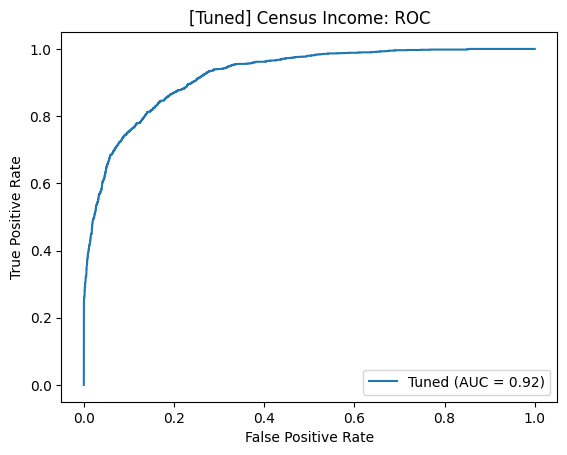

In [ ]:
n_classes = len(np.unique(y_train))

# Fit the model to the training data
classifier_tune.fit(X_train, y_train)

# Predict probabilities for each class
######
y_scores2 = classifier_tune.predict_proba(X_test)[:, 1]  

# Compute the FPR, TPR, and AUC
fpr2, tpr2, _ = roc_curve(y_test, y_scores2)
roc_auc2 = auc(fpr2, tpr2)

# Plot the ROC curve
# plt.plot(fpr, tpr, label='Original Class (AUC = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, label='Tuned (AUC = %0.2f)' % roc_auc2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('[Tuned] Census Income: ROC')
plt.legend(loc='lower right')
plt.show()